# Exercise 3 : Stochastic Gradient Learning in Neural Networks
## Vincent HERFELD

### Question 1 : 

> We would like to minimise the empirical risk between the real classes and the linearly estimated classes defined for $n$ observations $\{(X_1, y_1), ... , (X_n, y_n)\}$ by :
>$ R_n(w) = \frac{1}{n} \sum_{i=1}^n (y_i - w^t X_i)^2 = \frac{1}{n} \sum_{i=1}^n g(w, X_i, y_i)$ over $w \in \mathbb{R}^d$ with $g(w, x, y) = (y - w^tX)^2$. 

This is the empirical representation of the expected risk : $R(w) = \mathbb{E}_{(X,y) \sim \mathbb{P}}\left[g(w, X, y)^2\right]$ .

In short, we want to find $w^* = argmin_{w \in \mathbb{R}^d} R_n(w)$. 

To do this we can apply the stochastic gradient descent since we verify the sufficent conditions for convergence :

 >  $\forall (x,y),\, g : w \mapsto g(w, x, y)$ is differentiable in $\mathbb{R}^d$ by composition of differentiable functions and $\nabla_w g(w, X, y) = -2X(y - w^tX).$ 
 
 >  $Hess_w(g)(w,X,y) = 2XX^t $, and $\forall y \neq 0_{\mathbb{R^d}},\, y^t (2XX^t) y = 2 (X^ty)^t(X^ty) = 2 (X^ty)^2 \geq 0$ so $Hess_w(f)$ is semi-positive definite in all points this means that $g$ is convex. If $X$ is full rank then $g$ is strictly convex.
 
>  We also need $(\eta_k)_k$ to verify : $\sum \eta_k = \infty$ and $\sum \eta_k^2 < \infty$

>  We want $\nabla g$ to be $L-$smooth and thus to have a certain $B > 0$ such that $\forall (w, X,y), \, ||\nabla g(w,X,y)||^2 \leq B^2$. Sadly this is not verified on the whole space. What we can do to avoid this, is place ourselves on the unit ball of $\mathbb{R}^d$. Indeed, we are not interested in the scale of $w$ but in the angle it has with other vectors of the space. Limiting ourselves to the unit ball and normalizing the data allows us to choose $B = \sqrt8$,  $\left(||\nabla g(w,X,y)||^2 \leq 4||X||^2 ||(y - w^tX)||^2 \leq 4(||y||^2 + ||w||^2||X||^2) = 8\right)$, verify the convergence criterions. 

As explained in the course this last condition is quite restrictive. And after trying out the following I have noticed that without the constraint on $w$ we find better minima.

We will now apply the following algorithm :

> - pick initial $w \leftarrow w_0$
> - pick $\left( \eta_{k} \right)_k$ a non-increasing sequence of step sizes usually $(\frac{1}{k^\alpha})_k$ with $\alpha \in ]\frac{1}{2}, 1]$.
> - for $k \in \{1,...,N\}$ do :
>    - for $l \in \{1,...,n\}$ do :
>        - $i \sim Uniform(\{0,...,n-1\})$
>        - $w \leftarrow w - \eta_{l + kN} \nabla g(w, X_i, y_i)$
> - return $w$

Now let's implement this:

In [207]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

In [208]:
def grad_g(w, X, y):
    return -2 * (y - w.T @ X) * X

def sto_gradient_descent(w0, X, y, N, grad_g, nu):
    """
    Performs stochastic gradient descent
    
    parameters :
        w0 : initial point
        X, y : training data
        N : number of epochs
        grad_g : gradient of the g function
        nu : decreasing sequence of step sizes
    
    returns :
        w : estimation of the minimizer of Rn(.) in R^d
    """
    
    n = np.shape(X)[1]
    w = w0
    MSE = []
    for k in range(N):
        for l in range(n):
            i = np.random.randint(0, n-1)
            dg = grad_g(w, X[:,i], y[i])
            w = w - nu[l + n*k] *  dg 
            nw = np.linalg.norm(w)
        MSE.append(np.sum((y - w.T @ X)**2)/n)
    return w, MSE

### Question 2 :

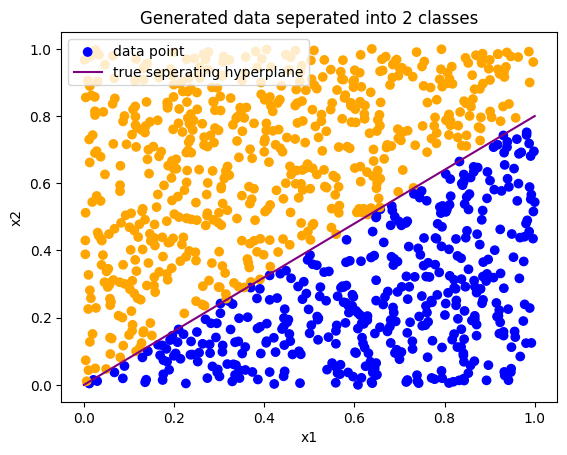

In [209]:
n = 1000 #number of data points
d = 2 #dimensionality of the data
X = np.random.uniform(0, 1, (n, 2)).T #generating the data according to a uniform distribution over the square
w_ = np.array([-1, 1.25]) #ground truth decision vector

y = np.array([1 if w_.T @ x >= 0 else -1 for x in X.T]) #ground truth labels according to the decision vector

#plot the data and the seperating hyperplane

col = np.where(y == 1, 'orange', 'b')
plt.scatter(X[0,:], X[1,:], c=col)
plt.title("Generated data seperated into 2 classes")
plt.plot(np.linspace(0, 1, 100), -w_[0]  * np.linspace(0, 1, 100) / w_[1], "purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["data point", "true seperating hyperplane"])
plt.show()

### Question 3 :

Let's apply our gradient descent on this data.

Estimated minimizer w* = [-1.47892914  1.87650517]
True minimizer w_ = [-1.    1.25]
Distance between w_ and w* : 0.7885948587837412
Estimation accuracy : 0.995


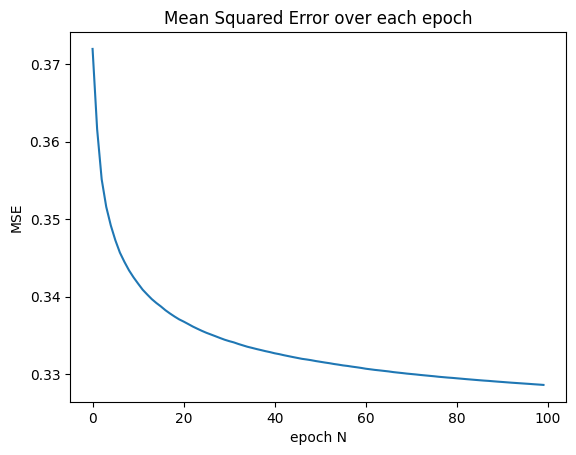

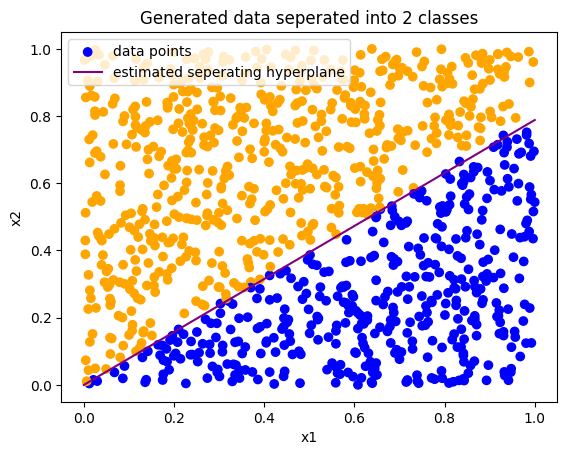

In [210]:
w0 = np.random.normal(0,1,d) #initial vector chosen randomly
N = 100 #number of epochs
nu = [1/k for k in range(1, n * N + 1)] #step sequence that verifies the conditions
w, MSE = sto_gradient_descent(w0, X, y, N, grad_g, nu)

#print information about the output

print("Estimated minimizer w* = {}".format(w))
print("True minimizer w_ = {}".format(w_))
print("Distance between w_ and w* : {}".format(np.linalg.norm(w - w_)))

y_est = [1 if w.T @ x >= 0 else -1 for x in X.T]

print("Estimation accuracy : {}".format(np.count_nonzero(y - y_est == 0) / n))

#plot the mean squared error

plt.plot(MSE)
plt.title("Mean Squared Error over each epoch")
plt.ylabel("MSE")
plt.xlabel("epoch N")
plt.show()

col = np.where(y == 1, 'orange', 'b')
plt.scatter(X[0,:], X[1,:], c=col)
plt.plot()
plt.title("Generated data seperated into 2 classes")
plt.plot(np.linspace(0, 1, 100), -w[0]  * np.linspace(0, 1, 100) / w[1], "purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["data points", "estimated seperating hyperplane"])
plt.show()

As we can see we obtain a near perfect accuracy on this data. This is not suprising since the data is generated according to a linear decision.  
Let us add gaussian noise to the data and see if this algorithm is robust.

### Question 4 :

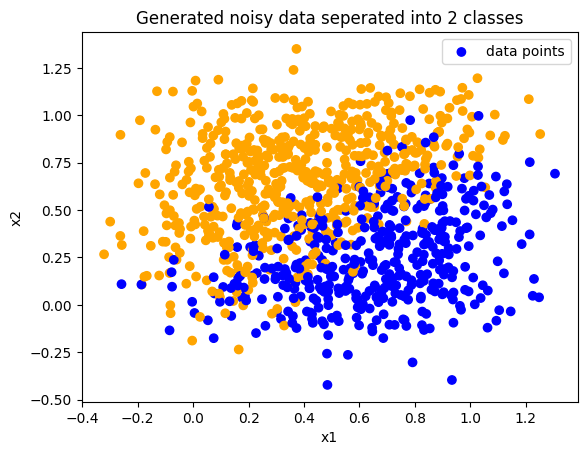

In [211]:
X_noisy = X + np.random.multivariate_normal([0,0], 0.02*np.eye(2), size=n).T #generate noisy data with additive noise

#plot the data

plt.scatter(X_noisy[0,:], X_noisy[1,:], c=col)
plt.plot()
plt.title("Generated noisy data seperated into 2 classes")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["data points"])
plt.show()

This time the data is not linearly seperable so we can expect a less accurate result. But the noise isn't too strong so we should still have a reasonably good estimation.

Estimated minimizer w* = [-1.09502802  1.4767848 ]
Vector used for synthesising w_ = [-1.    1.25]
Distance between w_ and w* : 0.03023083517126364
Estimation accuracy : 0.87
Ground truth accuracy : 0.868


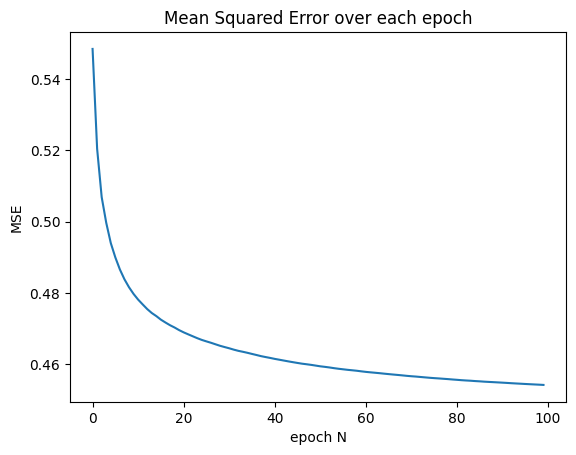

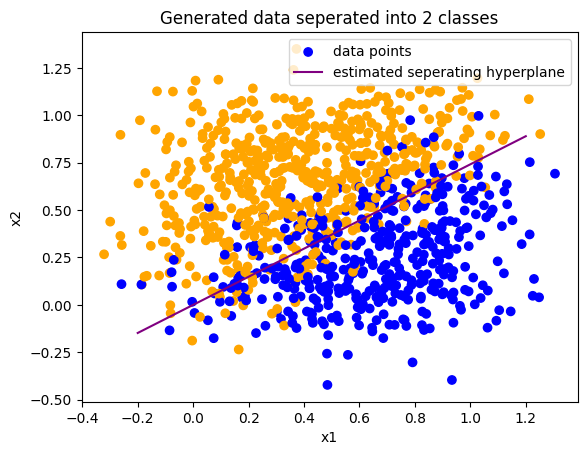

In [212]:
w0 = np.random.normal(0,1,d) #random initial vector
N = 100 #number of epochs
nu = [1 / k for k in range(1, n * N + 1)] #step sequence that verifies the conditions

w, MSE = sto_gradient_descent(w0, X_noisy, y, N, grad_g, nu) #apply SGD

print("Estimated minimizer w* = {}".format(w))
print("Vector used for synthesising w_ = {}".format(w_))
print("Distance between w_ and w* : {}".format(np.sum((w - w_)**2) / len(w)))

y_est = [1 if w.T @ x >= 0 else -1 for x in X_noisy.T]
y_gt = [1 if w_.T @ x >= 0 else -1 for x in X_noisy.T]

print("Estimation accuracy : {}".format(np.count_nonzero(y - y_est == 0) / n))
print("Ground truth accuracy : {}".format(np.count_nonzero(y - y_gt == 0) / n))


plt.plot(MSE)
plt.title("Mean Squared Error over each epoch")
plt.ylabel("MSE")
plt.xlabel("epoch N")
plt.show()

col = np.where(y == 1, 'orange', 'b')
plt.scatter(X_noisy[0,:], X_noisy[1,:], c=col)
plt.plot()
plt.title("Generated data seperated into 2 classes")
plt.plot(np.linspace(-0.2, 1.2, 100), -w[0]  * np.linspace(-0.2, 1.2, 100) / w[1], "purple")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(["data points", "estimated seperating hyperplane"])
plt.show()

As expected the accuracy is lower but it is still high for data that is not fully linearly seperable. Indeed even the ground truth vector doesn't allow high accuracy, sometimes our estimator (depends on the run) is even better than the ground truth.

### Question 5 :

We will now try to use this on breast cancer data : https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 

Looking at the description of the data on the website, we know that for each data point there are 30 features, and the data file holds also in first coordinate the ID of the data point (which is not important) and in second the label of the data point. So we will first parse the data (split features and labels) then use the previous algorithm on the data.

We will this time split the data in training and testing sets so we can evaluate how the classification reacts to new data.

We can note that : $w \in \mathbb{R}^{30}$ and we represent orange as benign and blue as malign.

#### Parsing the data

In [213]:
import csv
from sklearn.model_selection import train_test_split
 
datafile = "./data/new_data/breast-cancer-wisconsin.data"

rows = []
 
#read csv file
with open(datafile, 'r') as csvdata:
    csvreader = csv.reader(csvdata)

    for row in csvreader:
        rows.append(row)

    rows = np.array(rows)
    print(rows.shape)
    
X_cancer = rows[:,2:].astype("float")
y_cancer = np.array([1 if lab == 'B' else -1 for lab in rows[:, 1]])

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.3)

X_train = X_train.T 
X_test = X_test.T

#We normalize the data to verify convergence conditions
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


print("X_train shape : {}, X_test shape : {}, y_train shape : {}, y_test shape : {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))



(569, 32)
X_train shape : (30, 398), X_test shape : (30, 171), y_train shape : (398,), y_test shape : (171,)


#### Trying out on raw data

Estimated minimizer w* = [ 0.26668078 -0.32927169 -0.63279563  0.18207589  0.06885224  1.69949644
 -1.60802504  0.48207286  0.28060589 -1.79724762  0.07537736 -0.3317746
 -0.58878992 -1.1527896   1.19754896  0.35581898 -0.38646713 -2.10518456
  1.08458356 -2.96754558 -0.87642482  1.44978848 -0.03963604 -0.25321083
 -0.33130445  0.9529141  -0.65180523  0.49341065  1.41781528 -0.31881522]
Estimation accuracy on train set: 0.8417085427135679
Estimation accuracy on test set: 0.8070175438596491


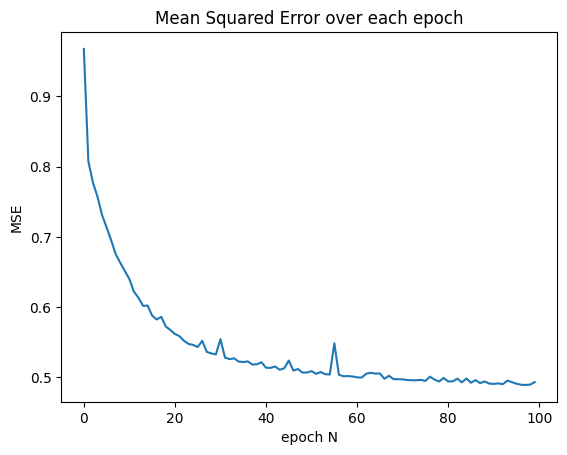

In [214]:
d,n_train = X_train.shape 
n_test = y_test.shape[0] 

w0 = np.random.normal(0,1,d).astype("float64")
N = 100
nu = [0.0001 for k in range(1, n_train * N + 1)] #this step sequence gets better results then 1/k
w, MSE = sto_gradient_descent(w0, X_train, y_train, N, grad_g, nu)

print("Estimated minimizer w* = {}".format(w))

y_train_est = np.array([1 if w.T @ x >= 0 else -1 for x in X_train.T])
y_test_est = np.array([1 if w.T @ x >= 0 else -1 for x in X_test.T]) 

print("Estimation accuracy on train set: {}".format(np.count_nonzero(y_train - y_train_est == 0) / n_train))
print("Estimation accuracy on test set: {}".format(np.count_nonzero(y_test - y_test_est == 0) / n_test))

plt.plot(MSE)
plt.title("Mean Squared Error over each epoch")
plt.ylabel("MSE")
plt.xlabel("epoch N")
plt.show()

Accuracy is impressively good.

What we can try out now is using PCA before the SGD to find which directions in $\mathbb{R}^d$ capture most of the data's information and maybe augment our accuracy by lowering the dimensionality of our problem. 

#### Applying PCA

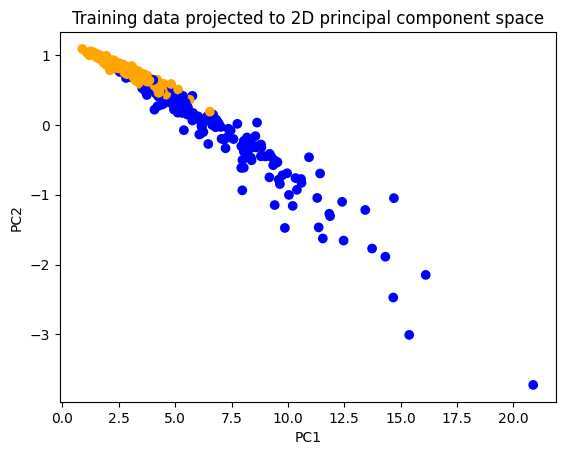

In [215]:
from scipy.linalg import svd

#Calculate the SVD of the data
U,a,V = svd(X_train)

#We build the projection matrix over a given number of PCs
num_comp = 2
PCA = []
for i in range(num_comp):
    PCA.append(U[:,i])
PCA = np.array(PCA) 

#We project the data onto the PC basis
X_train_proj = PCA @ X_train
X_test_proj = PCA @ X_test


col = np.where(y_train == 1, 'orange', 'b')
plt.scatter(X_train_proj[0,:],X_train_proj[1,:] , c=col)
plt.title("Training data projected to 2D principal component space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




The data seems to be seperable at some extent. Let's now apply our algorithm.

#### Applying the algorithm after PCA

Estimated minimizer w* = [-0.0295489   0.93351079]
Estimation accuracy on train set: 0.871859296482412
Estimation accuracy on test set: 0.8596491228070176


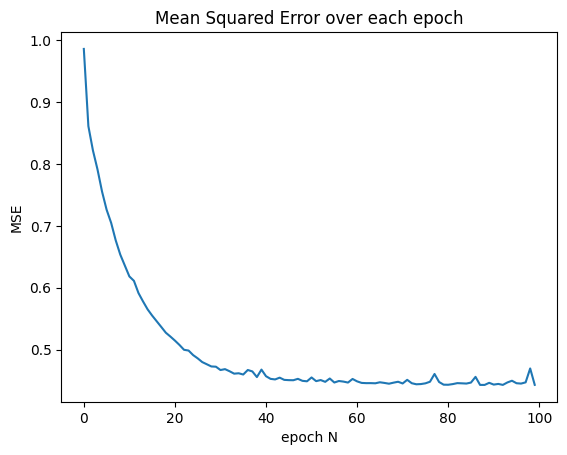

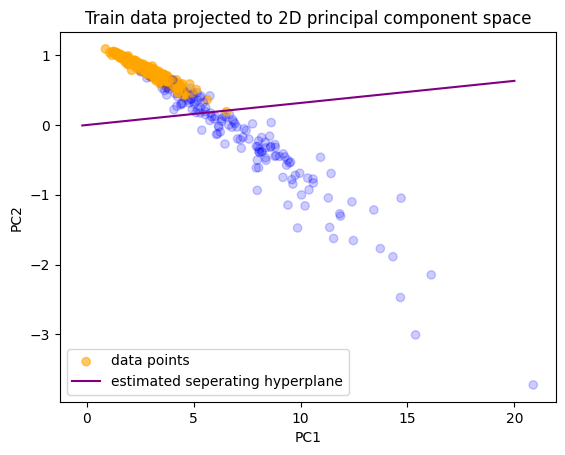

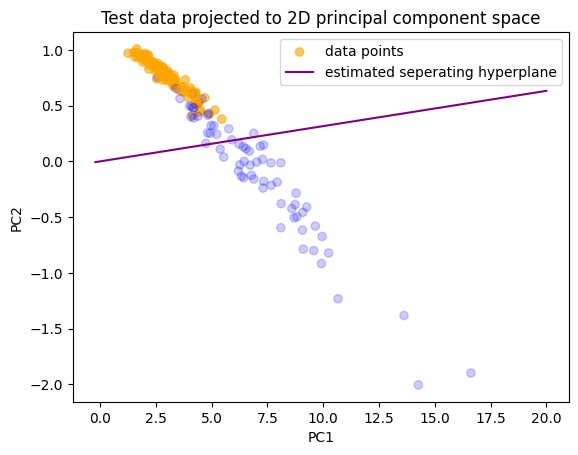

In [221]:
d,n_train = X_train_proj.shape 
n_test = y_test.shape[0] 

w0 = np.random.normal(0,1,d).astype("float64")
N = 100
nu = [0.0001 for k in range(1, n_train * N + 1)] #again better results
w, MSE = sto_gradient_descent(w0, X_train_proj, y_train, N, grad_g, nu)

print("Estimated minimizer w* = {}".format(w))

y_train_est = np.array([1 if w.T @ x >= 0 else -1 for x in X_train_proj.T])
y_test_est = np.array([1 if w.T @ x >= 0 else -1 for x in X_test_proj.T]) 

print("Estimation accuracy on train set: {}".format(np.count_nonzero(y_train - y_train_est == 0) / n_train))
print("Estimation accuracy on test set: {}".format(np.count_nonzero(y_test - y_test_est == 0) / n_test))

plt.plot(MSE)
plt.title("Mean Squared Error over each epoch")
plt.ylabel("MSE")
plt.xlabel("epoch N")
plt.show()

col = np.where(y_train == 1, 'orange', 'b')
al = np.where(y_train == 1, 0.6, 0.2)
plt.scatter(X_train_proj[0,:],X_train_proj[1,:] , c=col,  alpha = al)
plt.title("Train data projected to 2D principal component space")
plt.plot(np.linspace(-0.2, 20, 100), -w[0]  * np.linspace(-0.2, 20, 100) / w[1], "purple")
plt.legend(["data points", "estimated seperating hyperplane"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

col = np.where(y_test == 1, 'orange', 'b')
al = np.where(y_test == 1, 0.6, 0.2)
plt.scatter(X_test_proj[0,:],X_test_proj[1,:] , c=col, alpha = al)
plt.title("Test data projected to 2D principal component space")
plt.plot(np.linspace(-0.2, 20, 100), -w[0]  * np.linspace(-0.2, 20, 100) / w[1], "purple")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(["data points", "estimated seperating hyperplane"])
plt.show()

By looking at the data it seems that we split under blue points that could have been better seperated, this is maybe due to the lack of a bias term in our model, forcing the hyperplane to pass through the origin. That said nothing seems to stop the hyper plane being a little more inclined to take in the upper blue cloud except for a single orange data point which is intriguing, because we miss classify more blue points than orange ones.

Nonetheless, we do obtain a satisfying accuracy of around 85% for training and test sets and it is better than the method without PCA. Also we have a representation of the data we can better view / understand. And calculation complexity is reduced because we place ourselves on a lower dimensional space.

So I would say that using PCA in this case is a good idea.